In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns
from scipy import stats
import math
from __future__ import division

# turn of data table rendering
pd.set_option('display.notebook_repr_html', False)

sns.set_palette(['#00A99D', '#F5CA0C', '#B6129F', '#76620C', '#095C57'])
np.version.full_version

'1.9.1'

## Data
The data used in this example contains reporting from the [Federal Aviation Administration Wildlife Strike Database](http://wildlife.faa.gov/database.aspx) in 2012 and 2013 in the US state of California. We only use daily wild life strike incident frequencies.

In [ ]:
# Load the data from a csv file.
data = pd.read_csv('data/wildlife.csv')

# We only need the incident dates this time
data = data[['INCIDENT_DATE']]
data.INCIDENT_DATE = pd.to_datetime(data.INCIDENT_DATE)
data = data.groupby('INCIDENT_DATE')['INCIDENT_DATE'].size()
data.head()

INCIDENT_DATE
2012-01-02       1
2012-01-04       2
2012-01-05       5
2012-01-06       3
2012-01-07       2
dtype: int64

In [ ]:
# Set the index to contain all days in 2012 and 2013
days_2012_2013 = pd.date_range('1/1/2012', '12/31/2013')
data = pd.DataFrame(data, index=days_2012_2013, columns=['incidents'])
data.head()

            incidents
2012-01-01        NaN
2012-01-02          1
2012-01-03        NaN
2012-01-04          2
2012-01-05          5

In [ ]:
# Fill the data with no strike incidents (NaN) with a zero
data = data.fillna(0)
data.head()

            incidents
2012-01-01          0
2012-01-02          1
2012-01-03          0
2012-01-04          2
2012-01-05          5

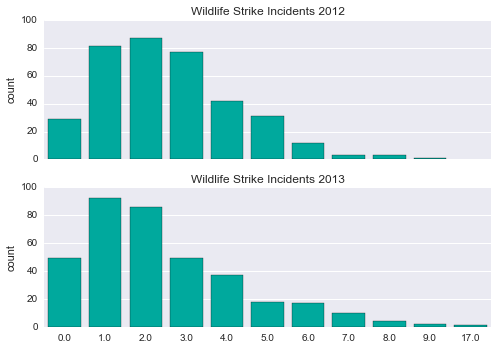

In [ ]:
# Plot of the daily strike incident frequencies of 2012 and 2013
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, sharey=True)
sns.barplot(data['2012'].incidents, ax=ax1)
sns.barplot(data['2013'].incidents, ax=ax2)
ax1.set_title('Wildlife Strike Incidents 2012')
ax2.set_title('Wildlife Strike Incidents 2013')
ax1.set_xlabel('')
ax2.set_xlabel('')
plt.show()

## Hypothesis testing
Let's asume that the Federal Aviation Administration launched a new Wildlife Strike Prevention Program in 2013. We want to know if there is a significant decline in the number of daily strike incidents in 2013 as opposed to 2012. This forms our operational definition. We choose an alpha level of .05 as our level of significance. A probability smaller than the alpha level leads to rejecting the null hypothesis.

|Hypothesis||$\alpha = .05$||
|---|---|---|:---:|
|Null|$H_0:$|$\bar{x} = \mu$|
|Alternative|$H_a:$|$\bar{x} \lt \mu$|



In [ ]:
# We assume stats from the wildlife strike incidents in 2012
# to be our population parameters
mu = data['2012'].incidents.mean()
sigma = data['2012'].incidents.std()
mu, sigma

(2.5546448087431695, 1.6818182461905784)

In [ ]:
# We also take the average of strike incidents in 2013
xbar = data['2013'].incidents.mean()
xbar

2.4328767123287673

In [ ]:
# What is our sample size
n = data['2013'].incidents.count()
n

365

In [ ]:
# Calculate the standard error
SE = sigma / math.sqrt(n)
SE

0.08803039035048664

We notice the mean average wildlife strike incidents is somewhat lower in 2013. We need to find out if this is due to the normal variation in the data. In other words, could we draw this mean by pure random chance? To find out, we calculate the z score for our sample mean and check this against the significance level alpha.

In [ ]:
# Calculate the z score for the mean of 2013 (xbar)
zscore = (xbar - mu) / SE
zscore

-1.3832506697924574

In [ ]:
# Calculate the critical value of the alpha level on one side of the
# distribution, because we're only intrested in a mean decline
alpha = .05
critical_value = stats.norm.ppf(alpha)
critical_value

-1.6448536269514729

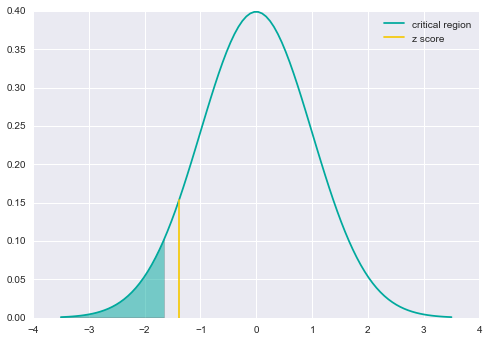

In [ ]:
# Plot the normal distribution
samples = 100
x_plot = np.linspace(-3.5, 3.5, samples)
y_plot = stats.norm.pdf(x_plot, 0, 1)
plt.plot(x_plot, y_plot)

# Plot the critical region
x_crit = np.linspace(-3.5, critical_value, samples)
y_crit = stats.norm.pdf(x_crit, 0, 1)
plt.fill_between(x_crit,  y_crit, alpha=.5)

# Plot the z score
plt.plot([zscore, zscore], [0, stats.norm.pdf(zscore)])

# Show legend
plt.legend(['critical region', 'z score'])
plt.show()

In [ ]:
# So given these values let's test the alternative hypothesis
zscore < critical_value

False

This means we could have drawn a mean sample xbar from the real population pure by random chance, therefore we fail to reject the null hypothesis. In other words, there is no significant difference of average daily strike incidents between 2013 and 2012.

In [ ]:
# The probability of drawing this sample mean is about 8%
p = stats.norm.cdf(zscore)
p

0.083294009028340998

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns
from scipy import stats
import math
from __future__ import division

# turn of data table rendering
pd.set_option('display.notebook_repr_html', False)

sns.set_palette(['#00A99D', '#F5CA0C', '#B6129F', '#76620C', '#095C57'])
fill_color = '#F5CA0C'
np.version.full_version

'1.9.1'

## Data
In the example we take a random sample of 25 housing prices in our neighbourhood and compare them against the average price of a house in the whole country.

In [ ]:
# data = np.random.random_sample(25) * 360000 + 100000 / floor it
housing_prices = pd.Series(
    [319711.,  289066.,  212512.,  195347.,  245589.,  418577.,
     301112.,  327251.,  434408.,  224529.,  450276.,  423406.,
     230321.,  275374.,  215945.,  209971.,  322661.,  292517.,
     378317.,  194028.,  347261.,  104542.,  231457.,  335174.,
     369656.])
housing_prices.head()

0    319711
1    289066
2    212512
3    195347
4    245589
dtype: float64

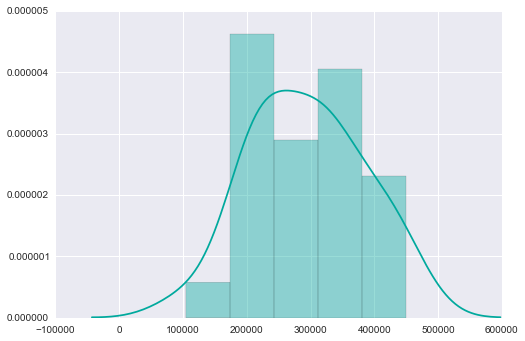

In [ ]:
sns.distplot(housing_prices)
plt.show()

## Hypothesis
We want to know if there is a significant difference in the mean housing price, compared to the average price of a house in our country. The latter has a mean of $\mu=289.100$. We choose as our test criterium an alpha level of 5%. So our hypothesis states:

|Hypothesis|||$\alpha = .05$|
|---:|:---:|---|:---|
|$H_0:$|$\bar{x} = \mu$|There is no significant difference in mean housing price|
|$H_a:$|$\bar{x} \neq \mu$|There is a significant difference in the mean housing price|


In [ ]:
# The mean housing price is a given
mu = 289100.
mu

289100.0

In [ ]:
# The sample statistics
n = housing_prices.count()
xbar = housing_prices.mean()
s = housing_prices.std(ddof=1)
n, xbar, s

(25, 293960.32000000001, 88348.432213839144)

In [ ]:
# Show the mean difference
xbar - mu

4860.320000000007

It looks like the housing prices in our neighbourhood are slightly higher than the average price of a house in the whole country. But is a  4860.32 difference significant?

## The t-distribution
Since we don't know the standard deviation of the population, we can't use the the standard normal distribution to perform our hypothesis test. If we don't know this population parameter we us the t-distribution. The shape of the t-distribution is closely related to the degress of freedom we have in the dataset. For a series (like we have here) this is $n-1$. Below a plot of the difference in shape from the normal distribution.

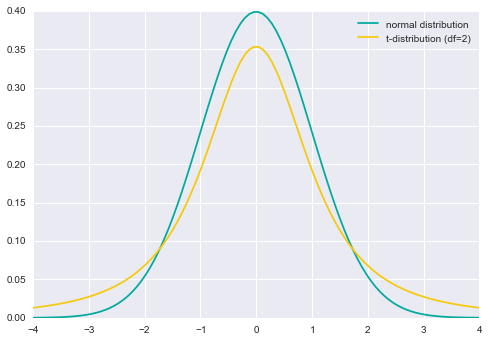

In [ ]:
# Plot the normal distribution
samples = 100
dof = 2
x_plot = np.linspace(-4, 4, samples)
y_plot = stats.norm.pdf(x_plot, 0, 1)
plt.plot(x_plot, y_plot)

x_plot = np.linspace(-4, 4, samples)
y_plot = stats.t.pdf(x_plot, dof)
plt.plot(x_plot, y_plot)

# Show legend
plt.legend(['normal distribution', 't-distribution (df=2)'])
plt.show()

## Effect of increased degrees of freedom
The t-distribution tends to grow towards the normal distribution when the degrees of freedom increase. If we have a sample size bigger than $n=30$, the differences between the t and normal distribution are very small. Below a projection of the effect on the t-distribution while increasing the degrees of freedom from 1, 4, 14 to 29.

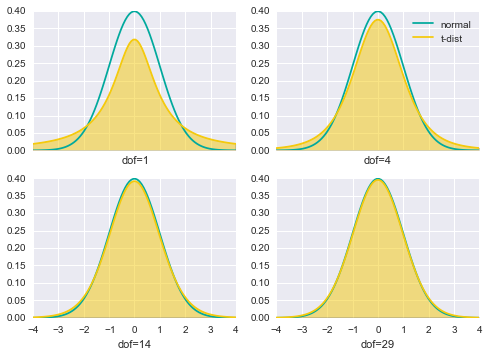

In [ ]:
f, (ax1, ax2) = plt.subplots(2, 2, sharex=True)
axes = [ax1[0], ax1[1], ax2[0], ax2[1]]
ax = 0

samples = 100
degrees_of_freedom = [1, 4, 14, 29]

for dof in degrees_of_freedom:
    x_plot = np.linspace(-4, 4, samples)
    y_plot = stats.norm.pdf(x_plot, 0, 1)
    axes[ax].plot(x_plot, y_plot)

    y_fill = stats.t.pdf(x_plot, dof)
    axes[ax].fill_between(x_plot,  y_fill, alpha=.5, facecolor=fill_color)

    y_plot = stats.t.pdf(x_plot, dof)
    axes[ax].plot(x_plot, y_plot)
    axes[ax].set_xlabel('dof=' + str(dof))

    ax += 1

axes[1].legend(['normal', 't-dist'])
plt.show()

## The one-sample t-test
Let's find out what out t-statistic related to our sample mean. We use the follwing formula:

$$t=\frac{\bar{x}-\mu}{s\cdot\sqrt{n}}$$

In [ ]:
# Calculate the t-statistic for the sample mean
se = s / math.sqrt(n)
t_statistic = (xbar - mu) / se
t_statistic

0.27506543569647368

In [ ]:
# What is the probability of getting this mean?
p = stats.t.sf(t_statistic, dof) * 2. # two-sided test
p

0.78521626726148908

In [ ]:
# To test our alternative hypothesis
alpha = .05
p < alpha / 2 #two sided

False

So we fail to reject the null hypothesis. A mean difference of 4860.32 in housing prices between our neigbourhood and the whole country is not significant.

In [ ]:
# To perform a t-test more quickly, we can use scipy.stats ttest_1samp
# for a one-sample t-test. The function returns the t-statistic and
# the p-value in one single call. Slightly different results, but close
t_statistic, p = stats.ttest_1samp(housing_prices, mu)
t_statistic, p

(0.27506543569647363, 0.78562014170787664)

## Cohen's d effect size
Cohen's d is an effect size measure. According to Wikipedia, in statistics, an [effect size](http://en.wikipedia.org/wiki/Effect_size) is a quantitative measure of the strength of a phenomenon. Cohen's d is the standardized mean difference that measures the distance between two means in standard units (standard deviations). The larger the result (positive or negative), the larger the effect. Rule of thumb; small (0.2), medium (0.5) and large (0.8). Click the link to see a great interactive visualization on [Interpreting Cohen's d effect size](http://rpsychologist.com/d3/cohend/). The formula for Cohen's d is as follows:


$$Cohen's\ d=\frac{\bar{x}-\mu}{s}$$

In [ ]:
# Calculate Cohen's d
d = (xbar - mu) / s
d

0.055013087139294738

This is a very small effect, acording to our rule of thumb stated above. The two mean are only 0.055 standard deviations apart.

## Confidence interval
In addition to our test result, we want to calculate an interval in which our population parameter will probably lie. In this case the true average housing price in our neighbourhood. With the t-statistic we just calculated, we can calculate a 95% confidence interval.

In [ ]:
# Calculate the 95% confidence interval
dof = n - 1
t_critical = abs(stats.t.ppf(alpha / 2, dof)) # two sided
margin_of_error = t_critical * se

CI_lower =  xbar - margin_of_error
CI_upper =  xbar + margin_of_error
CI_lower, CI_upper

(257491.87956635334, 330428.76043364668)

This means that we are for 95% certain that the true mean housing price in our neighborhood lies between 257.491 and 330.428.

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import math
from __future__ import division

# turn of data table rendering
pd.set_option('display.notebook_repr_html', False)

sns.set_palette(['#00A99D', '#F5CA0C', '#B6129F', '#76620C', '#095C57'])
np.version.full_version

'1.9.1'

## Data
We use two samples of the same subjects, in this case a group of 19 randomly selected women walking on high heels in one sample and flat shoes in another. The samples show the number of steps taken in 30 days for each woman in the group.

In [ ]:
high_heels = pd.Series(
    [189158.,  192110.,  176194.,  156349.,  161981.,  152096.,
     168058.,  156401.,  174939.,  170711.,  170485.,  150565.,
     167770.,  157289.,  191459.,  160661.,  190667.,  184006.,  174503.])
flat_shoes = pd.Series(
    [188777.,  196981.,  190510.,  184603.,  192341.,  197897.,
     154040.,  168098.,  192263.,  154085.,  176084.,  189249.,
     176291.,  151454.,  198118.,  162959.,  167480.,  159884.,  184386.])

data = pd.DataFrame({'high': high_heels, 'flat': flat_shoes})
data.head()

     flat    high
0  188777  189158
1  196981  192110
2  190510  176194
3  184603  156349
4  192341  161981

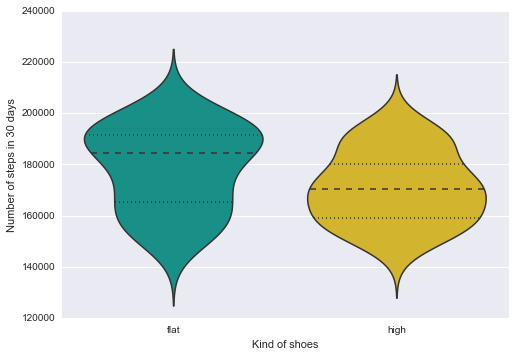

In [ ]:
# Let's look at the difference in a side-by-side violin plot
sns.violinplot(data)
plt.ylabel('Number of steps in 30 days')
plt.xlabel('Kind of shoes')
plt.show()

Just peeking at the plot shows a higher average step frequency over the period of 30 days for the group of women wearing flat shoes. But is it a statistical significant difference?

In [ ]:
# The violin plot above shows the median, quartiles, IQR and
# probability density function (kernel density estimation)
# for both groups
data.describe()

                flat           high
count      19.000000      19.000000
mean   178184.210526  170810.631579
std     16113.058647   13748.423232
min    151454.000000  150565.000000
25%    165219.500000  158975.000000
50%    184386.000000  170485.000000
75%    191386.500000  180100.000000
max    198118.000000  192110.000000

## Hypothesis
We want to know if there is a significant difference in the mean steps taken in 30 days for women wearing high heels and the same group wearing flat shoes. While walking on high heels, the women scored a mean average of $\bar{x}_h=170810.63$. On flat shoes the mean average is $\bar{x}_f=178184.21$ We choose as our test criterium an alpha level of 5%. So our hypothesis states:

|Hypothesis|||$\alpha = .05$|
|---:|:---:|---|:---|
|$H_0:$|$\mu_h = \mu_f$|There is no significant difference in mean steps between groups|
|$H_a:$|$\mu_h \neq \mu_f$|There is a significant difference in mean steps between groups|

Note that the hypothesis is written to denote the whole population, not just the sample.

In [ ]:
# Take the difference of each subject
data['difference'] = data.high - data.flat
data.head()

     flat    high  difference
0  188777  189158         381
1  196981  192110       -4871
2  190510  176194      -14316
3  184603  156349      -28254
4  192341  161981      -30360

## Conduct a t-Test for dependent means
All steps below are actually the same as for a one sample t-test conducted on a sample of mean differences.

In [ ]:
# Calculate the point estimate (mean difference)
point_estimate = data['difference'].mean()
point_estimate

-7373.5789473684208

In [ ]:
# Calculate the sample standard deviation of the difference
s = data.difference.std()
s

19471.738275755764

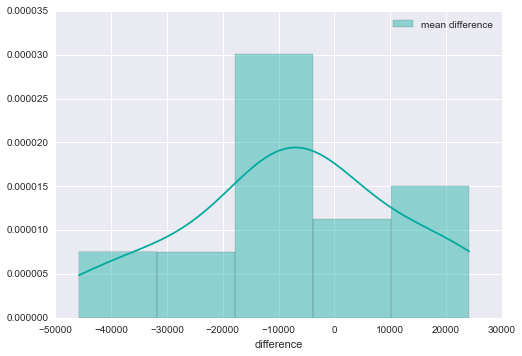

In [ ]:
# Show the mean difference distribution
sns.distplot(data.difference, label='mean difference')
plt.legend()
plt.show()

In [ ]:
# Calculate the t-statistic with the point estimate
n = data.high.count() # the same for both samples
se = s / math.sqrt(n) # standard error
t = point_estimate / se
n, se, t

(19, 4467.1231262680149, -1.6506325746898669)

In [ ]:
# So what is the probability of getting this mean difference?
dof = n - 1
p = stats.t.sf(abs(t), dof) * 2 # two sided
p

0.11615318918022229

In [ ]:
# To test our alternative hypothesis
alpha = .05
p < alpha / 2 # two sided

False

We fail to reject the null. There is no statistical significant difference in the mean differences between steps taken on high heels or flat shoes.

In [ ]:
# A quicker way to perform a dependent t-test is to call the scipy
# function ttest_rel on both samples to get our t-statistic and
# p value
t_statistic, p = stats.ttest_rel(data.high, data.flat)
t_statistic, p

(-1.6506325746898667, 0.11615318918022235)

## Confidence interval

In [ ]:
# Calculate t-critical to use with our confidence interval
t_critical = abs(stats.t.ppf(alpha / 2, dof)) # two sided
t_critical

2.1009220402409601

In [ ]:
# Calculate the confidence interval
margin_of_error = se * t_critical
CI_lo = point_estimate - margin_of_error
CI_hi = point_estimate + margin_of_error
CI_lo, CI_hi

(-16758.656379814995, 2011.498485078152)

We are confident that the true mean difference lies somewhere between -16758 and 2011. This confidence interval crosses 0, so a true mean difference could be 0 (meaning no difference at all).

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import math
from __future__ import division

# turn of data table rendering
pd.set_option('display.notebook_repr_html', False)

sns.set_palette(['#00A99D', '#F5CA0C', '#B6129F', '#76620C', '#095C57'])
np.version.full_version

'1.23.5'

## Data
We have collected samples of the wine prices of two fictitious online liquorstores, bestliqs.com and cheapliq.com.

In [ ]:
bestliqs_wine_prices = pd.Series(
    [9, 5, 6, 11, 8, 5, 7, 13, 12, 13, 9, 8, 10, 6, 11, 9, 7, 12])
cheapliq_wine_prices = pd.Series(
    [11, 10, 12, 9, 8, 13, 14, 15, 12, 11, 13, 8, 9, 11])

data = pd.DataFrame({'bestliqs': bestliqs_wine_prices,
                     'cheapliq': cheapliq_wine_prices})
data.describe()

bestliqs   cheapliq
count  18.000000  14.000000
mean    8.944444  11.142857
std     2.645134   2.178819
min     5.000000   8.000000
25%     7.000000   9.250000
50%     9.000000  11.000000
75%    11.000000  12.750000
max    13.000000  15.000000

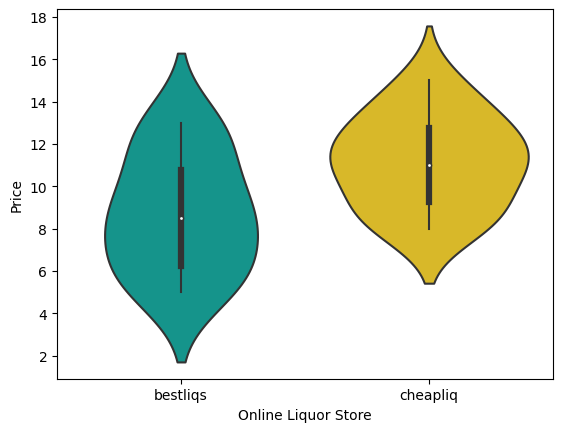

In [ ]:
sns.violinplot(data.dropna())
plt.xlabel('Online Liquor Store')
plt.ylabel('Price')
plt.show()

## Question and hypothesis
Well, it looks like cheapliq.com isn't as cheap as they say. However, is the difference statistically significant? We don't want to spend too much on the first batch of wine for our new cellar. Which online liquor store to choose if we want to decide on the lowest mean wine price?

|Hypothesis|||$\alpha = .05$|
|---:|:---:|---|:---|
|$H_0:$|$\mu_{best} = \mu_{cheap}$|There is no significant difference in mean wine prices|
|$H_a:$|$\mu_{best} \neq \mu_{cheap}$|There is a significant difference in mean wine prices|

## Independent Samples t-test

In [ ]:
# First find out what the mean prices are
xbar_best = data.bestliqs.mean()
xbar_cheap = data.cheapliq.mean()
xbar_best, xbar_cheap

(8.944444444444445, 11.142857142857142)

In [ ]:
# Then we get the sample standard devation for each liquor store
s_best = data.bestliqs.std(ddof=1)
s_cheap = data.cheapliq.std(ddof=1)
s_best, s_cheap

(2.6451336499586917, 2.1788191176076888)

## The Standard Error of the Mean
To calculate the standard error of the mean combined for both independent wine price samples, we need to use the following formula:

$$sem=\sqrt{\frac{s_{best}^2}{n_{best}}+\frac{s_{cheap}^2}{n_{cheap}}}$$


In [ ]:
# Calculate the standard error of the mean combined
n_best = data.bestliqs.count()
n_cheap = data.cheapliq.count()
sem = math.sqrt(s_best ** 2 / n_best +
                s_cheap ** 2 / n_cheap)
sem

0.8531100847677227

In [ ]:
# Now calculate the t-statistic
t = (xbar_best - xbar_cheap) / sem
t

-2.5769390582356815

In [ ]:
# Get the criotical values for a two-tailed test at alpha .05
alpha = .05
dof = ((s_best**2/n_best) + (s_cheap**2/n_cheap))**2/(((s_best**2 / n_best)**2 /(n_best-1))+((s_cheap**2 / n_cheap)**2/(n_cheap-1)))
t_critical = stats.t.ppf(alpha / 2, dof)  # two sided
t_critical

-2.0426426900981536

In [ ]:
print(dof)

29.87088618850302


## Hypothesis testing

In [ ]:
# Test our alternative hypothesis
t < t_critical or t > -t_critical

True

In [ ]:
# Another way to test the alternative hypothesis by comparing
# the probability of getting this mean with the alpha level.
p = stats.t.sf(abs(t), dof) * 2  # two sided
p

0.01512946515275131

In [ ]:
p < alpha

True

Based on these result, we conclude that the difference in mean wine price is not due to random chance or variation in the samples. Therefor we will reject the null hypothesis. Bestliqs.com is, on average, the better choice for the better wine price. Note there is a 5% chance (1 - alpha) on commiting a type I error in which the null hypothesis is true, but was rejected.

## Using scipy.stats or statsmodels

In [ ]:
# A quicker way to get these results is to call scipy stats
# ttest_ind on both samples for unequal variances
# equal_var False makes it effectively Welch's t-test
t_statistic, p = stats.ttest_ind(data.bestliqs, data.cheapliq.dropna(),
                                 equal_var=False)
t_statistic, p

(-2.5769390582356815, 0.015153519382495291)

In [ ]:
# Another alternative is using Statsmodels
t_statistic, p, dof = sm.stats.ttest_ind(data.bestliqs, data.cheapliq.dropna(),
                   alternative='two-sided', usevar='unequal')
t_statistic, p, dof

(-2.576939058235681, 0.015153519382495312, 29.87088618850303)

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import math
from __future__ import division

# turn of data table rendering
pd.set_option('display.notebook_repr_html', False)

sns.set_palette(['#00A99D', '#F5CA0C', '#B6129F', '#76620C', '#095C57'])
np.version.full_version

'1.9.1'

## Data
Here we create two samples of different sample size. We want to know if the sample means are significantly different.

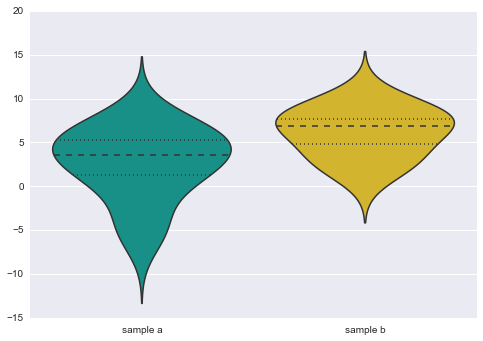

In [ ]:
sample_a = np.array([4.9, 6.2, 1.0, -4.8, 2.2, 5.4])
sample_b = np.array([2.8, 6.9, 8.4])

sns.violinplot([sample_a, sample_b], names=['sample a', 'sample b'])
plt.show()

In [ ]:
# Find the mean for both samples
xbar_a = sample_a.mean()
xbar_b = sample_b.mean()

xbar_a, xbar_b

(2.4833333333333338, 6.0333333333333341)

## Hypothesis
Is there a statistical significant difference between the two sample means at an alpha level of .05?

|Hypothesis|||$\alpha = .05$|
|---:|:---:|---|:---|
|$H_0:$|$\mu_{a} = \mu_{a}$|There is no significant difference between a and b|
|$H_a:$|$\mu_{b} \neq \mu_{b}$|There is a significant difference between a and b|

## Sum of Squares
First we need to find the sum of squares from both samples. We do this by summing all the differences from the mean in the sample, then square them. The following formula applies:

$$SS=\sum(x_i-\bar{x})^2$$

In [ ]:
# Find the sum of squares for both samples
ss_a = np.sum((sample_a - xbar_a) ** 2)
ss_b = np.sum((sample_b - xbar_b) ** 2)

ss_a, ss_b

(83.48833333333333, 16.806666666666668)

## Pooled Variance
Since the sample size between a and b is different, we can use the pooled variance to account for these difference in calculations. The following formula applies:

$$S_p^2=\frac{SS_a+SS_b}{df_a + df_b}$$

In [ ]:
# Calculate the Degrees of Freedom for both samples
n_a = len(sample_a)
n_b = len(sample_b)
dof_a = n_a - 1
dof_b = n_b - 1

dof_a, dof_b

(5, 2)

In [ ]:
# Calculate the Pooled Variance
Sp2 = (ss_a + ss_b) / (dof_a + dof_b)
Sp2

14.327857142857143

## Standard Error
Now we can calculate the Standard Error by using the Pooled Variance instead of the individual variance. The following formula applies:

$$sem=\sqrt{\frac{S_p^2}{n_a}+\frac{S_p^2}{n_b}}$$

In [ ]:
# Calculate the Standard Error of the Mean
sem = np.sqrt(Sp2 / n_a + Sp2 / n_b)
sem

2.6765516194216339

## The t-Statistic
The t-statistic for the mean difference between these samples is calculated as follows:

$$t=\frac{(\bar{x}_a-\bar{x}_b)-(\mu_a-\mu_b)}{sem}$$

In [ ]:
# Calculate the t-statistic
observed_diff = xbar_a - xbar_b
expected_diff = 0  # we expect no difference between population means

t = (observed_diff - expected_diff) / sem
t

-1.3263334711127697

## The t-critical value
To test our hypothesis, we need to get the t-critical value.

In [ ]:
alpha = .05
t_critical = np.abs(stats.t.ppf(alpha / 2, dof_a + dof_b))  # two sided
t_critical

2.3646242510103002

## Hypothesis testing

In [ ]:
# We compare our t-statistic against the t-criticalk value to test the
# acceptance of the alternative hypothesis
-t_critical > t or t > t_critical

False

Since the t-statistic lies between the t-critical values of alpha, we fail to reject the null hypothesis. The mean difference from both samples is probably due to chance and therefore not statistical significant.

## Using scipy.stats or statsmodels

In [ ]:
# A quicker way to get these results is to call scipy stats
# ttest_ind on both samples
t_statistic, p = stats.ttest_ind(sample_a, sample_b)
t_statistic, p

(-1.3263334711127697, 0.22636455334070857)

In [ ]:
# Another alternative is using Statsmodels
t_statistic, p, dof = sm.stats.ttest_ind(sample_a, sample_b,
                   alternative='two-sided', usevar='pooled')
t_statistic, p, dof

(-1.3263334711127697, 0.22636455334070857, 7.0)

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import math
from __future__ import division

# turn of data table rendering
pd.set_option('display.notebook_repr_html', False)

sns.set_palette(['#00A99D', '#F5CA0C', '#B6129F', '#76620C', '#095C57'])
np.version.full_version, scipy.version.full_version, \
pd.version.version, sm.version.full_version

('1.9.1', '0.14.0', '0.15.2', '0.6.1')

## Baseball data
We use baseball stats data from the [Lahman’s Baseball Database](http://www.seanlahman.com/baseball-archive/statistics) as provided by the Udacity course [Intro to Data Science](https://www.udacity.com/course/ud359).

In [ ]:
# Load the stats data from a csv file
df = pd.read_csv('data/baseball_stats.csv')
df.head()

             name handedness  height  weight    avg   HR
0       Tom Brown          R      73     170  0.000    0
1  Denny Lemaster          R      73     182  0.130    4
2       Joe Nolan          L      71     175  0.263   27
3     Denny Doyle          L      69     175  0.250   16
4   Jose Cardenal          R      70     150  0.275  138

## Question and hypothesis
We want to know if there is a statistical significant difference in the career batting average between left-handed and right-handed players. We choose an alpha level of 5% as the significance level. We test against the hypothesis below:

|Hypothesis|||$\alpha = .05$|
|---:|:---:|---|:---|
|$H_0:$|$\mu_{R} = \mu_{L}$|There is no significant difference between left and right handedness|
|$H_a:$|$\mu_{R} \neq \mu_{L}$|There is a significant difference between left and right handedness|

## Some data wrangling

In [ ]:
# Get the appropriate samples from the dataframe
# Filter out the batting averages of 0.0 (pitchers assumed)
left_handed_avg  = df[(df['handedness'] == 'L') & (df['avg'] != 0)]['avg']
right_handed_avg = df[(df['handedness'] == 'R') & (df['avg'] != 0)]['avg']

left_handed_avg.count(), right_handed_avg.count()

(256, 546)

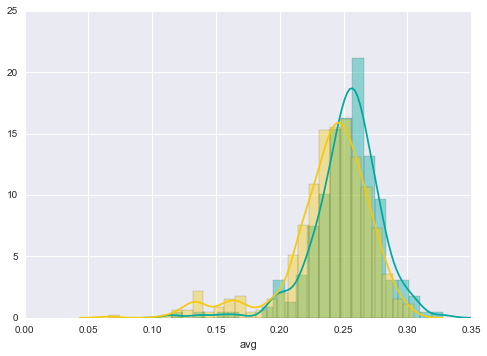

In [ ]:
# Plot the distributions
sns.distplot(left_handed_avg)
sns.distplot(right_handed_avg)
plt.show()

## Welch's t-Test
This t-test is a more generic hypothesis test for independent samples, based on Student's t-test. The difference with the Student's t-test is that we account for sample size and variance differences. If we set equal_var to False in the scipy stats ttest_ind, the function performs the Welch's t-test instead of the Student's t-test. The following formula applies:

$$t=\frac{(\bar{x}_a-\bar{x}_b)-(\mu_a-\mu_b)}{\sqrt{\frac{s_a^2}{n_a}+\frac{s_b^2}{n_b}}}$$


Note that the variance of $a$ and $b$ are used, not the pooled variance.

In [ ]:
# Perform Welch's t-test (equal_var=False)
t, p = stats.ttest_ind(left_handed_avg, right_handed_avg, equal_var=False)
t, p

(6.3229680493265361, 4.8741482089894302e-10)

This function assumes we want to perform a two-sided t-test. For a one-sided t-test use $\frac{1}{2}p$ since it is only true for one side of the distribution.

## Hypothesis testing

In [ ]:
# Test if we can reject the null hypothesis
alpha = .05
p < alpha

True

There seems to be a statistical significant difference between left and right handed players. We are 95% confident that the difference is not due to random chance.

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import math
from __future__ import division

# turn of data table rendering
pd.set_option('display.notebook_repr_html', False)

sns.set_palette(['#00A99D', '#F5CA0C', '#B6129F', '#76620C', '#095C57'])
np.version.full_version, scipy.version.full_version, \
pd.version.version, sm.version.full_version

('1.9.1', '0.14.0', '0.15.2', '0.6.1')

## Non-normal distribution

In [ ]:
# Create a set with an obvious non-normal distribution
data = pd.Series([1,1,0,1,2,2,3,2,1,3,3,2,8,2,1,6,2,1,1,2,2,1,3,2,1,
                  2,3,6,2,3,2,2,1,2,2,3,2,1,2,3,2,3,2,3,1,6,1,8,1,1])
data.describe()

count    50.000000
mean      2.340000
std       1.709637
min       0.000000
25%       1.000000
50%       2.000000
75%       3.000000
max       8.000000
dtype: float64

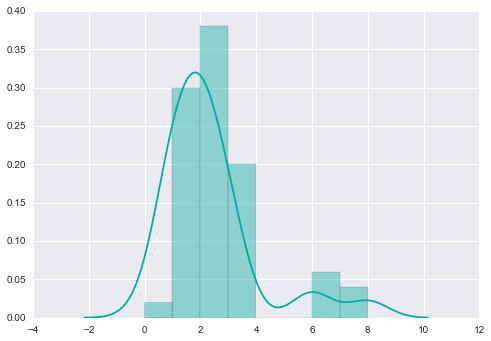

In [ ]:
# Plot the non-normal distribution
sns.distplot(data)
plt.show()

In [ ]:
# The null hypothesis states the data was drawn from a normal distribution.
# It returns the w-statistic and the probability that this statistic
# came from a normal distribution (p value)
w, p = stats.shapiro(data)
w, p

(0.7413722276687622, 4.960041621870914e-08)

In [ ]:
# Test the null hypothesis with 5% alpha
alpha = .05
p > alpha

False

Since this p value is much larger than the significance level, we reject the null hypothesis that this sample comes from a normal distribution.

## Normal distribution

In [ ]:
# Let perform the same test on a random generated normal distribution
mu, sigma, n = 0, .1, 50
data = np.random.normal(mu, sigma, n)
data

array([-0.06305276, -0.12291651, -0.04816977,  0.05572359,  0.13725905,
        0.1447485 , -0.20264179, -0.06685487, -0.0781263 , -0.00718376,
       -0.08506072, -0.03998016, -0.11571598,  0.12958116,  0.10986715,
        0.0649146 , -0.13533652, -0.1174784 , -0.0714837 , -0.03965943,
        0.01309047,  0.04284077,  0.02698651,  0.04941069, -0.01366992,
       -0.16790697,  0.02145848, -0.09678135, -0.07191305,  0.07613435,
        0.01198686, -0.14470548,  0.15809624, -0.09929681,  0.03842638,
        0.06481776, -0.13934484,  0.07156626, -0.10190243, -0.09960222,
        0.21799547, -0.02453129, -0.03748973, -0.17076149,  0.07634182,
       -0.02514305,  0.10922111, -0.15272102, -0.13171909, -0.04938742])

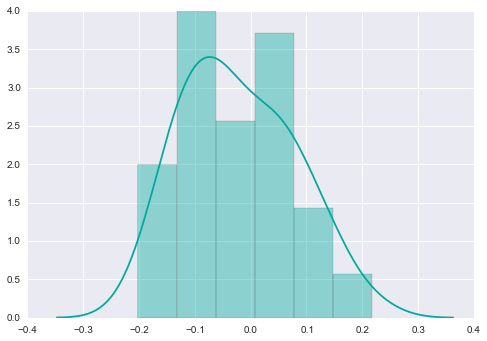

In [ ]:
# Plot the more 'normal' distribution
sns.distplot(data)
plt.show()

In [ ]:
# The Shapiro-Wilk test tests the null hypothesis that the data
# was drawn from a normal distribution.
w, p = stats.shapiro(data)
w, p

(0.9749879240989685, 0.3645625710487366)

In [ ]:
# Test the null hypothesis with 5% alpha
alpha = .05
p > alpha

True

Since this p value is much larger than the significance level, we retain the null hypothesis that this sample comes from a normal distribution.